# Automatyczne Uczenie Maszynowe 

## Laboratorium 2




### 1. <i>Pipelines</i>

Możemy budować skomplikowany łańcuch operacji złożony z metod preprocessingu, algorytmów ML i postprocessingu. 


> To build a composite estimator, transformers are usually combined with other transformers or with predictors (such as classifiers or regressors). The most common tool used for composing estimators is a Pipeline.

> Pipelines require all steps except the last to be a transformer. The last step can be anything, a transformer, a predictor, or a clustering estimator which might have or not have a .`predict(...)` method. **A pipeline exposes all methods provided by the last estimator: if the last step provides a transform method, then the pipeline would have a transform method and behave like a transformer. If the last step provides a predict method, then the pipeline would expose that method, and given a data X, use all steps except the last to transform the data, and then give that transformed data to the predict method of the last step of the pipeline.** 

> The class Pipeline is often used in combination with ColumnTransformer or FeatureUnion which concatenate the output of transformers into a composite feature space. TransformedTargetRegressor deals with transforming the target (i.e. log-transform y).

Więcej informacji https://scikit-learn.org/stable/modules/compose.html

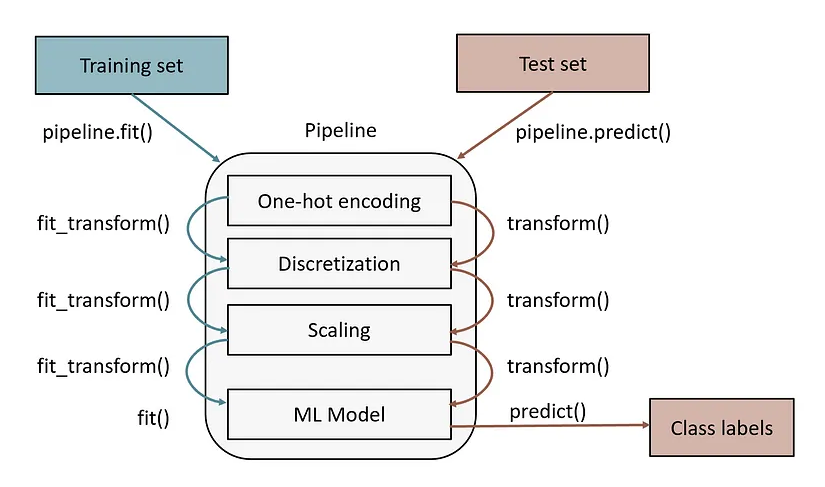


#### Zadanie 

1.1 Wykorzystując bibliotekę  `scikit-learn` i moduł `pipeline` zbuduj pipeline dla danych `train` and `test`. W danych występują braki danych - musisz sobie z nimi poradzić.  Pamiętaj, że w tym przypadku mamy do czynienia z problemem regresji. Sprawdź jakie jest MSE zbudowanego modelu.




In [ ]:
## Pakiety

import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer 
from sklearn.pipeline import Pipeline # moduł pipeline
from sklearn.impute import SimpleImputer # moduł imputacji braków danych
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # moduł przetwarzania danych
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # modele lasu losowego
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score # metryki
from sklearn.model_selection import train_test_split, GridSearchCV, KFold # selekcja hiperparametrów

set_config(transform_output = "pandas")


In [ ]:
## Obsługa zmiennych numerycznych
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('scale', MinMaxScaler())
])

## Obsługa zmiennych kategorycznych
...


## Pipeline

In [ ]:
## Fit



## Predict

1.2 Weźmy pod uwagę dane do klasyfikacji binarnej, chcemy przygotować *pipeline*, który powinien zadziałać dla dowolnego zbioru danych. 
Stwórz pipeline, poniższe punkty mogą służyć jako podpowiedź:

1. Zdefiniuj, które kolumny mają być przekształcane i w jaki sposób.
2. Podziel dane na próbkę treningową i testową.
3. Utwórz pipeline dla cech numerycznych i kategorycznych.
4. Utwórz ColumnTransformer, aby zastosować pipeline dla każdego zestawu kolumn.
5. Dodaj model do końcowego pipeline.
6. Wyświetl pipeline.
7. Przetestuj utworzony pipeline.
8.* Wykorzystaj funkcję `GridSearchCV` do optymalizacji hiperparametrów modelu. 
9.* Jak zmodyfikować pipeline, aby wybierać najlepszą metodę preprocessingu dla określonych danych?

Przetestuj pipeline na danych https://www.openml.org/search?type=data&status=active&id=45068

In [ ]:
import openml

# Lista dostępnych zbiorów danych
openml.datasets.list_datasets(output_format="dataframe")

# Wybór zbioru danych przed ID
dataset = openml.datasets.get_dataset(45068)

X, _, _, _ = dataset.get_data(dataset_format="dataframe")
y = X.loc[:, 'class']
X = X.drop(['class'], axis = 1)
print('Dane X', X.head())
print('Target: ', y.head())